In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression



In [4]:
!wget "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
!unzip "wine+quality.zip"

--2023-10-04 17:17:33--  https://archive.ics.uci.edu/static/public/186/wine+quality.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine+quality.zip’

wine+quality.zip        [ <=>                ]  89.21K   476KB/s    in 0.2s    

2023-10-04 17:17:34 (476 KB/s) - ‘wine+quality.zip’ saved [91353]

Archive:  wine+quality.zip
  inflating: winequality-red.csv     
  inflating: winequality-white.csv   
  inflating: winequality.names       


In [5]:
# Read the red wine data
red_wine_data = pd.read_csv("winequality-red.csv", sep=';')


In [6]:
red_wine_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [7]:


# Display the first few rows of the dataset
print("First few rows of the Red Wine dataset:")
print(red_wine_data.head())



First few rows of the Red Wine dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1 

In [8]:
# Get summary statistics for the numeric attributes
print("Summary statistics:")
print(red_wine_data.describe())



Summary statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000          

In [9]:

# Check for missing values
print("Missing values:")
print(red_wine_data.isnull().sum())



Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [10]:
# Correlation matrix
correlation_matrix = red_wine_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



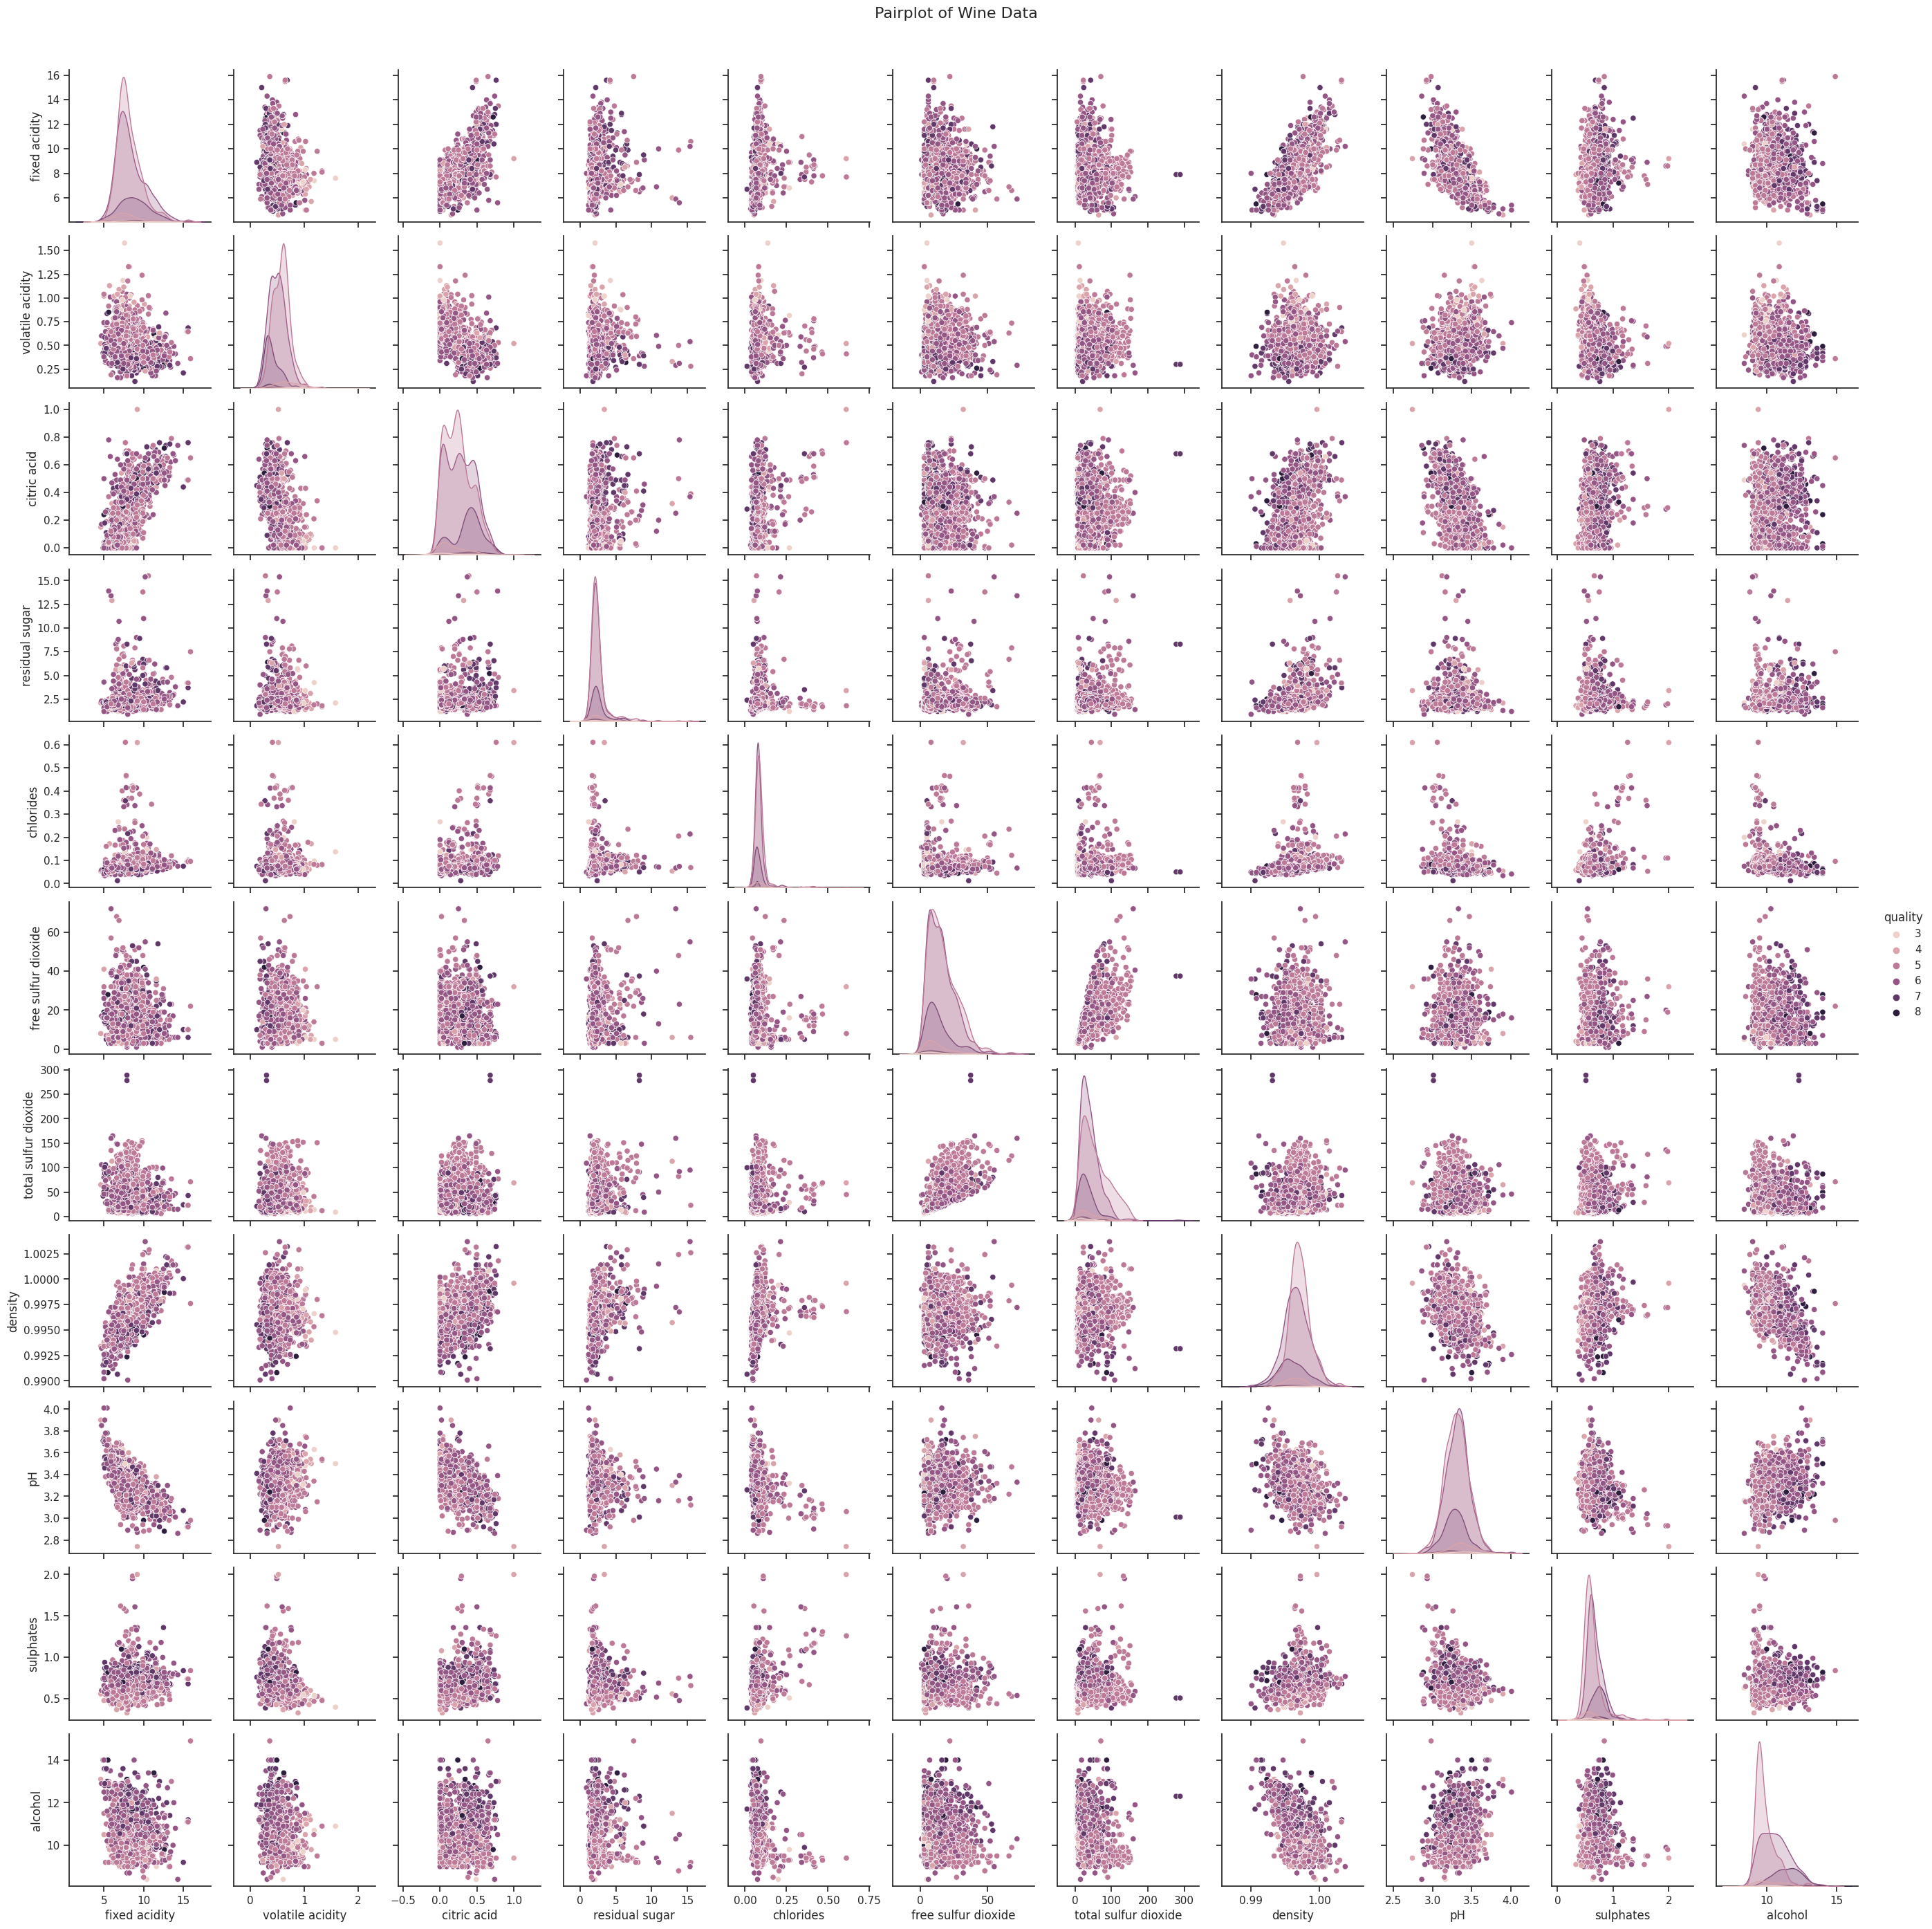

In [11]:
# Set the style and create a pairplot
sns.set(style="ticks")
sns.pairplot(red_wine_data, diag_kind="kde", markers="o", hue="quality")

plt.suptitle("Pairplot of Wine Data", y=1.02, fontsize=16)
plt.show()

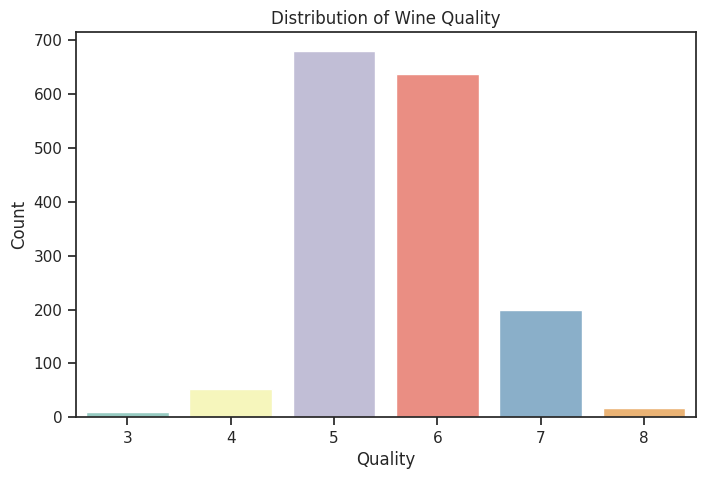

In [12]:
# Distribution of wine quality
plt.figure(figsize=(8, 5))
sns.countplot(data=red_wine_data, x='quality', palette="Set3")
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

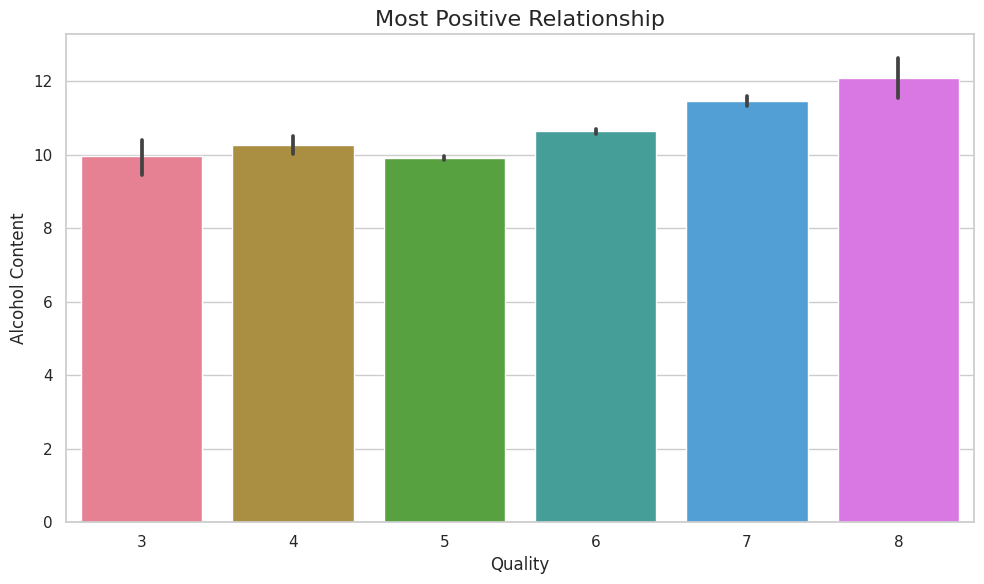

In [14]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x="quality", y="alcohol", data=red_wine_data, palette="husl")  # Change the palette to "husl"
plt.title("Most Positive Relationship", fontsize=16)
ax.set_xlabel("Quality", fontsize=12)
ax.set_ylabel("Alcohol Content", fontsize=12)
plt.tight_layout()
plt.show()

In [16]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x="quality", y="volatile acidity", data=red_wine_data)
plt.title("Most Negative Relationship", fontsize=16)
ax.set_xlabel("quality", fontsize=12)
ax.set_ylabel("volatile acidity", fontsize=12)
plt.tight_layout()
plt.show()

In [17]:
plt.figure(figsize=(10, 6))

# Create line plots for 'alcohol' and 'residual sugar' against 'density'
sns.lineplot(x="alcohol", y="density", data=red_wine_data, label='alcohol', marker='o')
sns.lineplot(x="residual sugar", y="density", data=red_wine_data, label='residual Sugar', marker='s')

plt.title("Density vs. Alcohol and Residual Sugar", fontsize=16)
plt.xlabel("Density", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

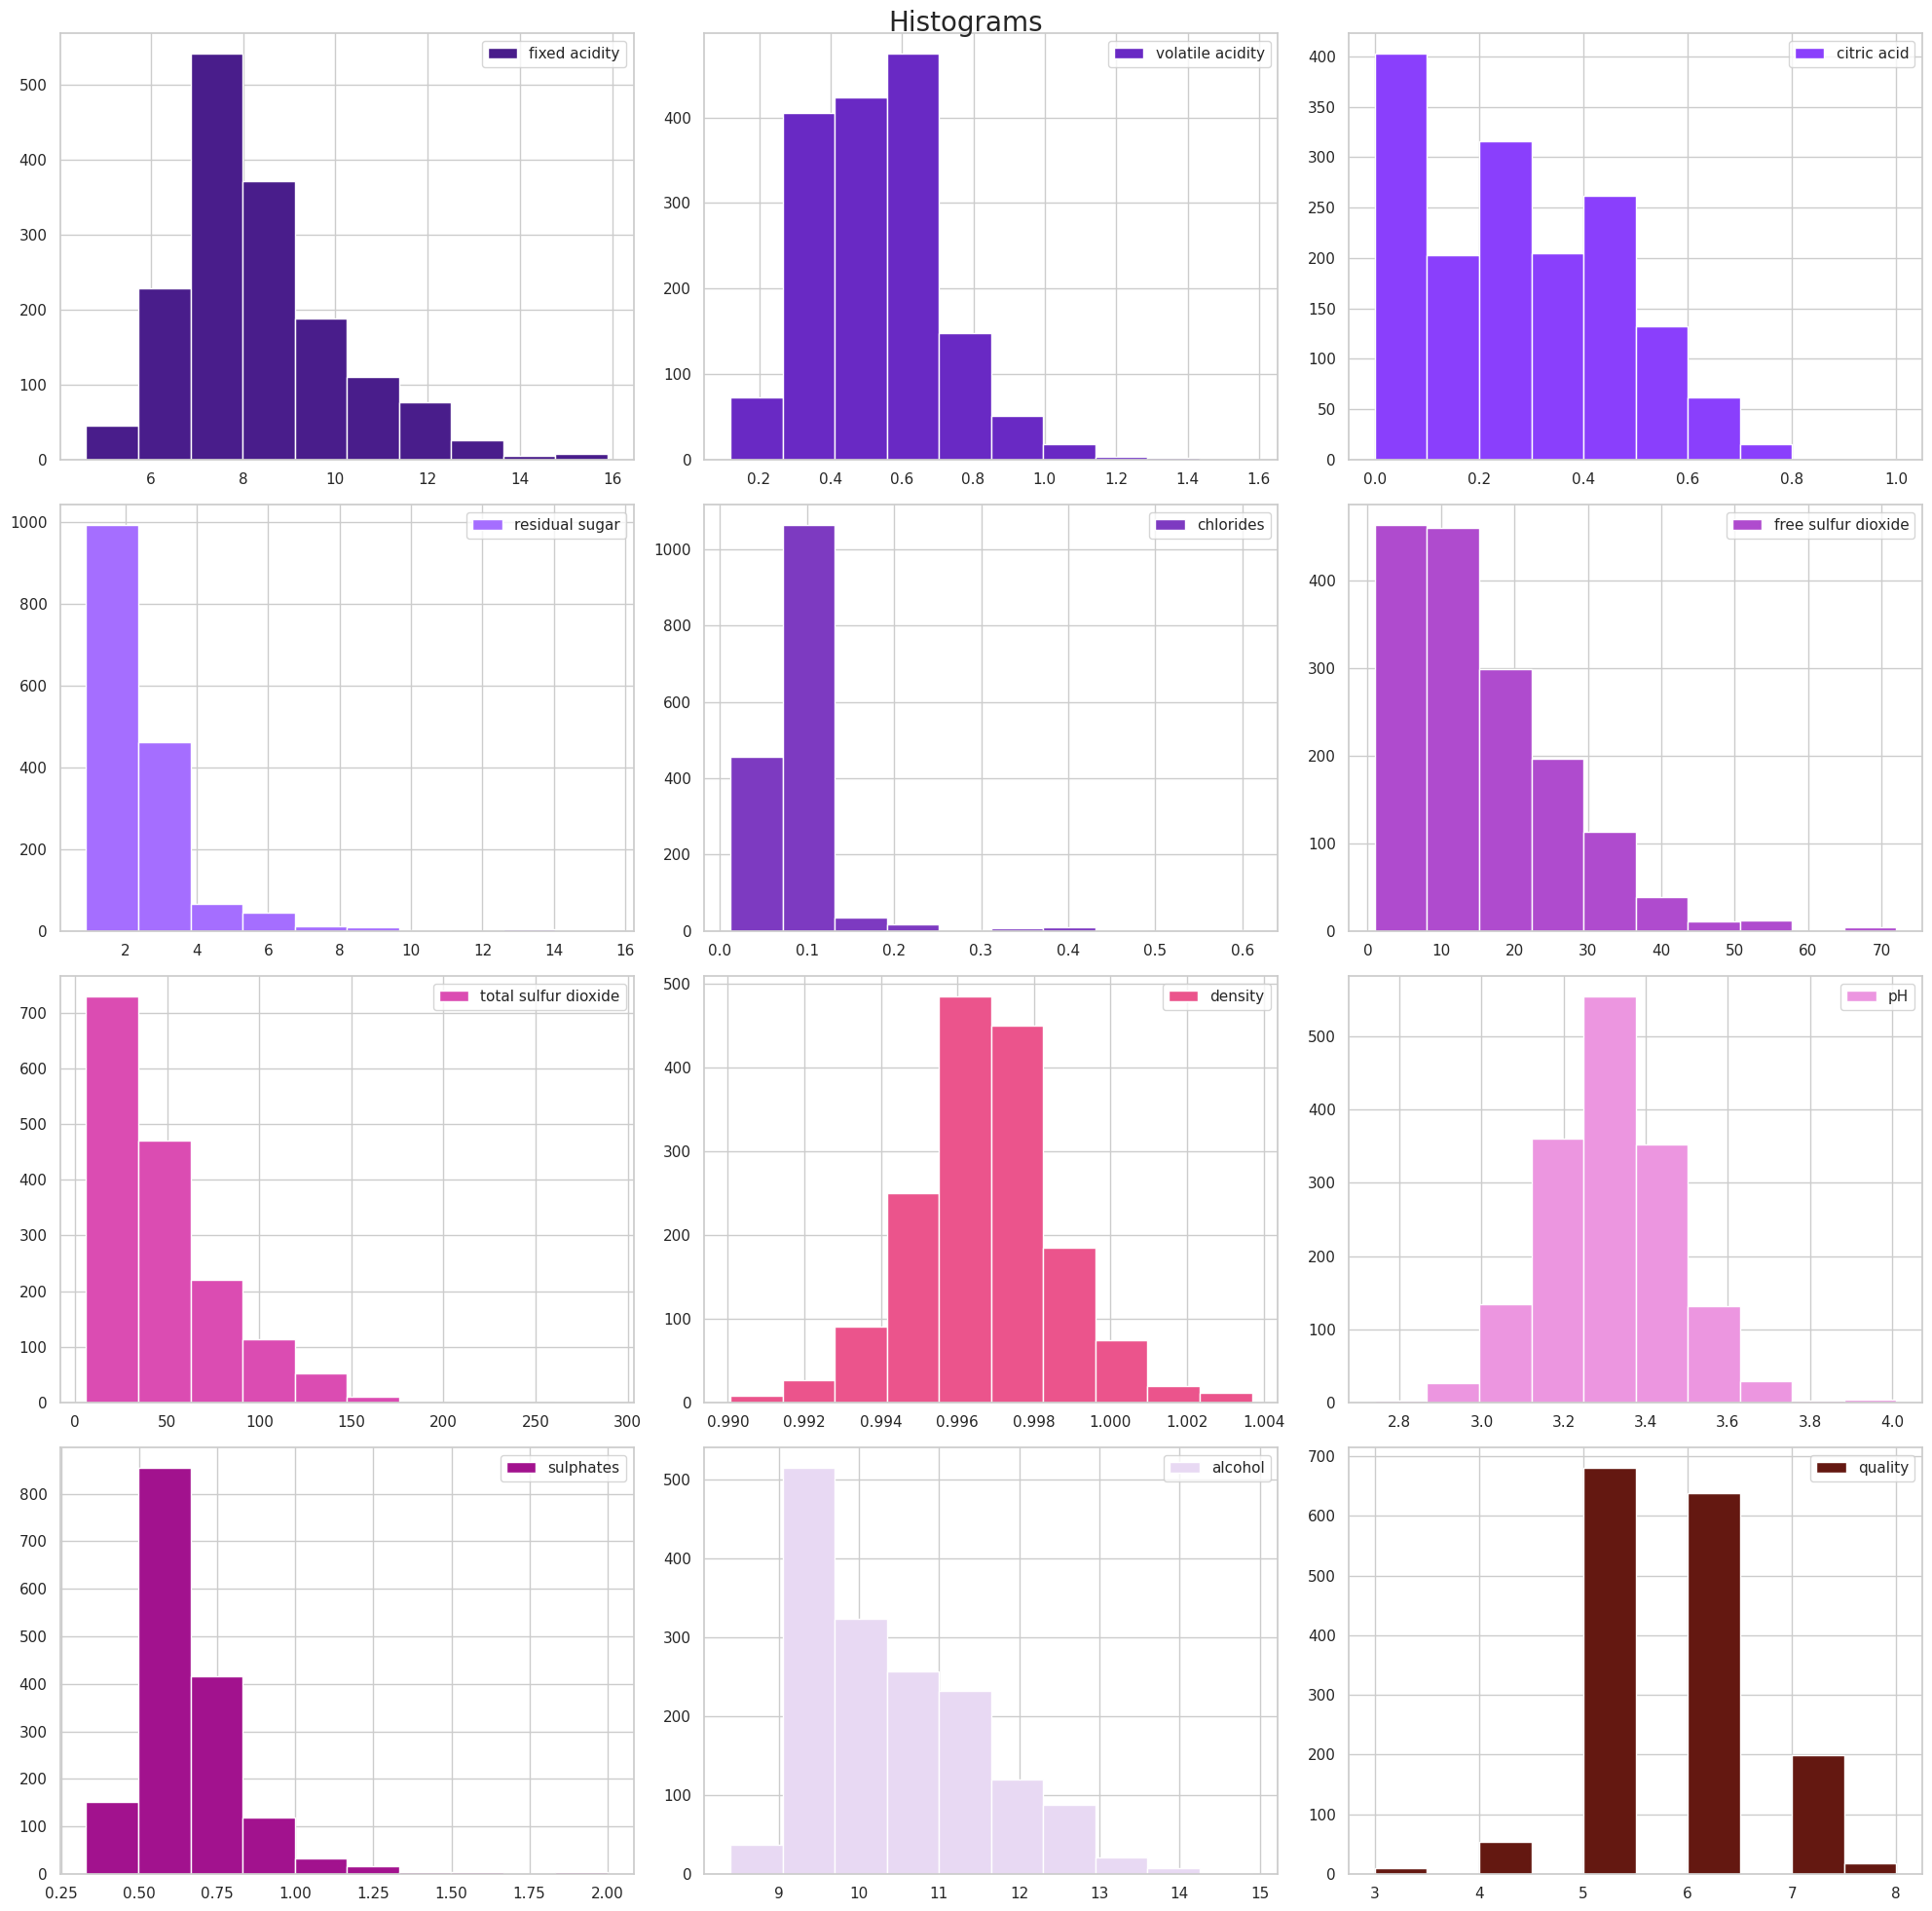

In [18]:

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']


for index, column in enumerate(red_wine_data.columns):
    if index < 12:
        ax = axes.flatten()[index]
        ax.hist(red_wine_data[column], color=colors[index], label=column)
        ax.legend(loc="best")

plt.suptitle("Histograms", size=20)
plt.tight_layout()
plt.show()

In [19]:
# Create box plots for numeric attributes to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=red_wine_data, orient="vertical", palette="Set2")
plt.title("Box Plots for Numeric Attributes (Red Wine)")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Display the first few rows of the dataset
print("First few rows of the Red Wine dataset:")
print(red_wine_data.head())

# Check for outliers using the IQR method
Q1 = red_wine_data.quantile(0.25)
Q3 = red_wine_data.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers (you can adjust this threshold as needed)
threshold = 1.5

# Create a mask to filter out outliers
outlier_mask = ((red_wine_data < (Q1 - threshold * IQR)) | (red_wine_data > (Q3 + threshold * IQR))).any(axis=1)

# Remove outliers from the dataset
red_wine_data_no_outliers = red_wine_data[~outlier_mask]






First few rows of the Red Wine dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1 

In [21]:
# Display the first few rows of the dataset without outliers
print("First few rows of the Red Wine dataset without outliers:")
print(red_wine_data_no_outliers.head())

First few rows of the Red Wine dataset without outliers:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      

In [22]:
# Distribution of wine quality after removing outliers
plt.figure(figsize=(8, 5))
sns.countplot(data=red_wine_data_no_outliers, x='quality', palette="Set3")
plt.title("Distribution of Wine Quality (No Outliers)")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

In [23]:
# Create box plots for numeric attributes to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=red_wine_data_no_outliers, orient="vertical", palette="Set2")
plt.title("Box Plots for Numeric Attributes (Red Wine)")
plt.xticks(rotation=45)
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numeric attributes for scaling
numeric_features = red_wine_data.select_dtypes(include=['float64']).columns.tolist()

# Apply Standardization to the selected features
red_wine_data[numeric_features] = scaler.fit_transform(red_wine_data[numeric_features])

# Display the first few rows of the standardized dataset
print("First few rows of the standardized Red Wine dataset:")
print(red_wine_data.head())


First few rows of the standardized Red Wine dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

   

In [25]:
# Calculate correlations between features and the target variable
correlations_with_target = red_wine_data.corr()['quality'].abs()

correlation_threshold = 0.15
important_features = correlations_with_target[correlations_with_target > correlation_threshold]

# Display the important features
print("Important Features:")
print(important_features)


Important Features:
volatile acidity        0.390558
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



# Define the selected features and the target variable
features = ["volatile acidity", "citric acid", "sulphates", "alcohol", "density"]
target = "quality"

# Split the data into training and testing sets
X = red_wine_data[features]
y = red_wine_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_regressor = LinearRegression()

# Fit the model to the training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_regressor.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 0.519104129166935
Mean Squared Error (MSE): 0.4005968041921791
Root Mean Squared Error (RMSE): 0.6329271713176636
R-squared (R2) Score: 0.38700350051137744


In [27]:
# Define the selected features and the target variable
features = ["volatile acidity", "citric acid", "sulphates", "alcohol", "density"]
target = "quality"

# Split the data into training and testing sets
X = red_wine_data[features]
y = red_wine_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Make predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

Random Forest - Mean Squared Error: 0.34481874999999995
Random Forest - R-squared: 0.4723555343026645


In [29]:
# Define the selected features and the target variable
features = ["volatile acidity", "citric acid", "sulphates", "alcohol", "density"]
target = "quality"

red_wine_data['quality_category'] = pd.cut(red_wine_data['quality'], bins=[0, 4, 6, 10], labels=['poor', 'average', 'good'])

# Split the data into training and testing sets
X = red_wine_data[features]
y = red_wine_data['quality_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, you can print a classification report and confusion matrix for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.859375

Classification Report:
              precision    recall  f1-score   support

     average       0.89      0.94      0.92       262
        good       0.64      0.57      0.61        47
        poor       1.00      0.09      0.17        11

    accuracy                           0.86       320
   macro avg       0.84      0.54      0.56       320
weighted avg       0.86      0.86      0.85       320


Confusion Matrix:
[[247  15   0]
 [ 20  27   0]
 [ 10   0   1]]


In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

try:
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train, y_train)
    if not np.isnan(linear_regressor.intercept_):
        feature_importance = linear_regressor.coef_
        print("Feature Coefficients:", feature_importance)
    else:
        print("Linear Regression did not converge.")
except Exception as e:
    print("An error occurred:", str(e))

Feature Coefficients: [-0.2212883  -0.02966635  0.1048836   0.34783449  0.0344657 ]
